In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import time

In [165]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
import requests
key='8NBLCOTKI465W93V'
secKey = "d76154d8c11c709dbdaaa8cdf25c2b69424847ba85f2a569742d588d0d53c8b0"

In [166]:
maxRetry = 3

In [167]:
def getStockData(csym, isFull=False, interval="DAILY"):
    retry = 0
    output = None
    while(retry < maxRetry):
        try:
            if isFull:
                url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol="+csym+"&outputsize=full&apikey=8NBLCOTKI465W93V"
            else:
                url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol="+csym+"&apikey=8NBLCOTKI465W93V"
            r = requests.get(url)
            output = r.json()
            if output and "Time Series (Daily)" not in output:
                output = None
                time.sleep(10)
                continue
            #print(output)
            break
        except Exception as e:
            print(e)
            retry = retry + 1
            time.sleep(5)
    if not output:
        return None
    return output

In [168]:
def getTYData(interval, maturity):
    retry = 0
    output = None
    while(retry < maxRetry):
        try:
            url = "https://www.alphavantage.co/query?function=TREASURY_YIELD&interval="+interval+"&maturity="+maturity+"&apikey=8NBLCOTKI465W93V"
            r = requests.get(url)
            output = r.json()
            #print(output)
            break
        except Exception as e:
            print(e)
            retry = retry + 1
            time.sleep(5)
    if not output:
        return None
    return output

In [169]:
def getMA(csym, time_period, series_type="open", interval="daily"):
    retry = 0
    output = None
    while(retry < maxRetry):
        try:
            url = "https://www.alphavantage.co/query?function=SMA&symbol="+csym+"&interval="+interval+"&time_period="+str(time_period)+"&series_type="+series_type+"&apikey=8NBLCOTKI465W93V"
            print(url)
            r = requests.get(url)
            output = r.json()
            #print(output)
            break
        except Exception as e:
            print(e)
            retry = retry + 1
            time.sleep(5)
    if not output:
        return None
    return output

In [170]:
MA10 = getMA("PAYC", 10)
MA10

https://www.alphavantage.co/query?function=SMA&symbol=PAYC&interval=daily&time_period=10&series_type=open&apikey=8NBLCOTKI465W93V


{'Meta Data': {'1: Symbol': 'PAYC',
  '2: Indicator': 'Simple Moving Average (SMA)',
  '3: Last Refreshed': '2023-02-13',
  '4: Interval': 'daily',
  '5: Time Period': 10,
  '6: Series Type': 'open',
  '7: Time Zone': 'US/Eastern'},
 'Technical Analysis: SMA': {'2023-02-13': {'SMA': '329.2740'},
  '2023-02-10': {'SMA': '329.0880'},
  '2023-02-09': {'SMA': '329.0100'},
  '2023-02-08': {'SMA': '328.2270'},
  '2023-02-07': {'SMA': '326.3110'},
  '2023-02-06': {'SMA': '325.4120'},
  '2023-02-03': {'SMA': '323.4720'},
  '2023-02-02': {'SMA': '319.7420'},
  '2023-02-01': {'SMA': '315.2460'},
  '2023-01-31': {'SMA': '314.2750'},
  '2023-01-30': {'SMA': '312.9450'},
  '2023-01-27': {'SMA': '311.1710'},
  '2023-01-26': {'SMA': '309.9900'},
  '2023-01-25': {'SMA': '308.2870'},
  '2023-01-24': {'SMA': '306.1550'},
  '2023-01-23': {'SMA': '303.1760'},
  '2023-01-20': {'SMA': '301.6060'},
  '2023-01-19': {'SMA': '300.9000'},
  '2023-01-18': {'SMA': '300.9460'},
  '2023-01-17': {'SMA': '301.1690'},


In [171]:
MA5 = getMA("PAYC", 5)
MA5

https://www.alphavantage.co/query?function=SMA&symbol=PAYC&interval=daily&time_period=5&series_type=open&apikey=8NBLCOTKI465W93V


{'Meta Data': {'1: Symbol': 'PAYC',
  '2: Indicator': 'Simple Moving Average (SMA)',
  '3: Last Refreshed': '2023-02-13',
  '4: Interval': 'daily',
  '5: Time Period': 5,
  '6: Series Type': 'open',
  '7: Time Zone': 'US/Eastern'},
 'Technical Analysis: SMA': {'2023-02-13': {'SMA': '324.7540'},
  '2023-02-10': {'SMA': '327.4380'},
  '2023-02-09': {'SMA': '332.1500'},
  '2023-02-08': {'SMA': '337.1040'},
  '2023-02-07': {'SMA': '335.9180'},
  '2023-02-06': {'SMA': '333.7940'},
  '2023-02-03': {'SMA': '330.7380'},
  '2023-02-02': {'SMA': '325.8700'},
  '2023-02-01': {'SMA': '319.3500'},
  '2023-01-31': {'SMA': '316.7040'},
  '2023-01-30': {'SMA': '317.0300'},
  '2023-01-27': {'SMA': '316.2060'},
  '2023-01-26': {'SMA': '313.6140'},
  '2023-01-25': {'SMA': '311.1420'},
  '2023-01-24': {'SMA': '311.8460'},
  '2023-01-23': {'SMA': '308.8600'},
  '2023-01-20': {'SMA': '306.1360'},
  '2023-01-19': {'SMA': '306.3660'},
  '2023-01-18': {'SMA': '305.4320'},
  '2023-01-17': {'SMA': '300.4640'},
 

In [172]:
MA50 = getMA("PAYC", 50)
MA50

https://www.alphavantage.co/query?function=SMA&symbol=PAYC&interval=daily&time_period=50&series_type=open&apikey=8NBLCOTKI465W93V


{'Meta Data': {'1: Symbol': 'PAYC',
  '2: Indicator': 'Simple Moving Average (SMA)',
  '3: Last Refreshed': '2023-02-13',
  '4: Interval': 'daily',
  '5: Time Period': 50,
  '6: Series Type': 'open',
  '7: Time Zone': 'US/Eastern'},
 'Technical Analysis: SMA': {'2023-02-13': {'SMA': '315.2932'},
  '2023-02-10': {'SMA': '315.3236'},
  '2023-02-09': {'SMA': '315.4548'},
  '2023-02-08': {'SMA': '315.3896'},
  '2023-02-07': {'SMA': '315.3296'},
  '2023-02-06': {'SMA': '315.1504'},
  '2023-02-03': {'SMA': '314.7918'},
  '2023-02-02': {'SMA': '314.2006'},
  '2023-02-01': {'SMA': '313.6744'},
  '2023-01-31': {'SMA': '313.7930'},
  '2023-01-30': {'SMA': '314.2940'},
  '2023-01-27': {'SMA': '314.7654'},
  '2023-01-26': {'SMA': '315.1212'},
  '2023-01-25': {'SMA': '315.3500'},
  '2023-01-24': {'SMA': '315.5514'},
  '2023-01-23': {'SMA': '315.1948'},
  '2023-01-20': {'SMA': '314.8898'},
  '2023-01-19': {'SMA': '314.9594'},
  '2023-01-18': {'SMA': '315.4214'},
  '2023-01-17': {'SMA': '315.4254'},


In [173]:
MA200 = getMA("PAYC", 200)
MA200

https://www.alphavantage.co/query?function=SMA&symbol=PAYC&interval=daily&time_period=200&series_type=open&apikey=8NBLCOTKI465W93V


{'Meta Data': {'1: Symbol': 'PAYC',
  '2: Indicator': 'Simple Moving Average (SMA)',
  '3: Last Refreshed': '2023-02-13',
  '4: Interval': 'daily',
  '5: Time Period': 200,
  '6: Series Type': 'open',
  '7: Time Zone': 'US/Eastern'},
 'Technical Analysis: SMA': {'2023-02-13': {'SMA': '320.0004'},
  '2023-02-10': {'SMA': '319.8290'},
  '2023-02-09': {'SMA': '319.7284'},
  '2023-02-08': {'SMA': '319.5597'},
  '2023-02-07': {'SMA': '319.4358'},
  '2023-02-06': {'SMA': '319.3764'},
  '2023-02-03': {'SMA': '319.3182'},
  '2023-02-02': {'SMA': '319.1499'},
  '2023-02-01': {'SMA': '318.9740'},
  '2023-01-31': {'SMA': '318.9910'},
  '2023-01-30': {'SMA': '318.9904'},
  '2023-01-27': {'SMA': '319.0134'},
  '2023-01-26': {'SMA': '319.0259'},
  '2023-01-25': {'SMA': '319.0602'},
  '2023-01-24': {'SMA': '319.1729'},
  '2023-01-23': {'SMA': '319.3092'},
  '2023-01-20': {'SMA': '319.5335'},
  '2023-01-19': {'SMA': '319.7730'},
  '2023-01-18': {'SMA': '319.9733'},
  '2023-01-17': {'SMA': '320.1533'},

In [174]:
ty10Data = getTYData("daily", "10year")
print(ty10Data)

{'name': '10-Year Treasury Constant Maturity Rate', 'interval': 'daily', 'unit': 'percent', 'data': [{'date': '2023-02-10', 'value': '3.74'}, {'date': '2023-02-09', 'value': '3.67'}, {'date': '2023-02-08', 'value': '3.63'}, {'date': '2023-02-07', 'value': '3.67'}, {'date': '2023-02-06', 'value': '3.63'}, {'date': '2023-02-03', 'value': '3.53'}, {'date': '2023-02-02', 'value': '3.40'}, {'date': '2023-02-01', 'value': '3.39'}, {'date': '2023-01-31', 'value': '3.52'}, {'date': '2023-01-30', 'value': '3.55'}, {'date': '2023-01-27', 'value': '3.52'}, {'date': '2023-01-26', 'value': '3.49'}, {'date': '2023-01-25', 'value': '3.46'}, {'date': '2023-01-24', 'value': '3.46'}, {'date': '2023-01-23', 'value': '3.52'}, {'date': '2023-01-20', 'value': '3.48'}, {'date': '2023-01-19', 'value': '3.39'}, {'date': '2023-01-18', 'value': '3.37'}, {'date': '2023-01-17', 'value': '3.53'}, {'date': '2023-01-16', 'value': '.'}, {'date': '2023-01-13', 'value': '3.49'}, {'date': '2023-01-12', 'value': '3.43'}, 

In [175]:
ty2Data = getTYData("daily", "2year")
print(ty2Data)

{'name': '2-Year Treasury Constant Maturity Rate', 'interval': 'daily', 'unit': 'percent', 'data': [{'date': '2023-02-10', 'value': '4.50'}, {'date': '2023-02-09', 'value': '4.48'}, {'date': '2023-02-08', 'value': '4.45'}, {'date': '2023-02-07', 'value': '4.47'}, {'date': '2023-02-06', 'value': '4.44'}, {'date': '2023-02-03', 'value': '4.30'}, {'date': '2023-02-02', 'value': '4.09'}, {'date': '2023-02-01', 'value': '4.09'}, {'date': '2023-01-31', 'value': '4.21'}, {'date': '2023-01-30', 'value': '4.25'}, {'date': '2023-01-27', 'value': '4.19'}, {'date': '2023-01-26', 'value': '4.17'}, {'date': '2023-01-25', 'value': '4.11'}, {'date': '2023-01-24', 'value': '4.12'}, {'date': '2023-01-23', 'value': '4.21'}, {'date': '2023-01-20', 'value': '4.14'}, {'date': '2023-01-19', 'value': '4.09'}, {'date': '2023-01-18', 'value': '4.06'}, {'date': '2023-01-17', 'value': '4.18'}, {'date': '2023-01-16', 'value': '.'}, {'date': '2023-01-13', 'value': '4.22'}, {'date': '2023-01-12', 'value': '4.12'}, {

In [176]:
sData = getStockData("PAYC", True)
print(sData)

{'Meta Data': {'1. Information': 'Daily Time Series with Splits and Dividend Events', '2. Symbol': 'PAYC', '3. Last Refreshed': '2023-02-13', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2023-02-13': {'1. open': '319.3', '2. high': '323.755', '3. low': '317.23', '4. close': '322.75', '5. adjusted close': '322.75', '6. volume': '451887', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2023-02-10': {'1. open': '319.0', '2. high': '320.395', '3. low': '313.5', '4. close': '317.09', '5. adjusted close': '317.09', '6. volume': '479255', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2023-02-09': {'1. open': '327.0999', '2. high': '330.09', '3. low': '320.88', '4. close': '322.48', '5. adjusted close': '322.48', '6. volume': '1018760', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2023-02-08': {'1. open': '330.0', '2. high': '330.71', '3. low': '312.19', '4. close': '321.21', '5. adjusted close': 

In [177]:
df = pd.DataFrame(sData["Time Series (Daily)"])
df = df.T
print(df.columns)
#df = df.drop("1. open")
#df = df[["5. adjusted close"]].copy()
#df1 = pd.DataFrame().assign(StockClose=df["5. adjusted close"])
#df2 = pd.DataFrame().assign(Volume=df["6. volume"])
#df = pd.merge(df1, df2, left_index=True, right_index=True, how='outer')
#df[df.columns[0]] = df[df.columns[0]].astype(float)
#df[df.columns[1]] = df[df.columns[1]].astype(int)
df = df.drop("7. dividend amount", axis=1)
df = df.drop("4. close", axis=1)
df = df.drop("8. split coefficient", axis=1)
#df = df.drop("2. high", axis=1)
#df = df.drop("3. low", axis=1)
#df = df.drop("6. volume", axis=1)
for i,x in enumerate(df.columns):
    df[df.columns[i]] = df[df.columns[i]].astype(float)
    
df = df.sort_index()
#df = df.reset_index(drop=True)
df

Index(['1. open', '2. high', '3. low', '4. close', '5. adjusted close',
       '6. volume', '7. dividend amount', '8. split coefficient'],
      dtype='object')


,1. open,2. high,3. low,5. adjusted close,6. volume
2014-04-15,17.9000,17.920,15.150,15.35,3531700.0
2014-04-16,15.3500,16.090,15.210,15.62,266500.0
2014-04-17,15.9500,16.550,15.710,16.25,262100.0
2014-04-21,16.5900,16.590,16.010,16.10,78000.0
2014-04-22,16.2000,16.689,15.760,15.98,96100.0
...,...,...,...,...,...
2023-02-07,328.3700,347.400,325.325,344.52,504667.0
2023-02-08,330.0000,330.710,312.190,321.21,1536645.0
2023-02-09,327.0999,330.090,320.880,322.48,1018760.0
2023-02-10,319.0000,320.395,313.500,317.09,479255.0


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2224 entries, 2014-04-15 to 2023-02-13
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   1. open            2224 non-null   float64
 1   2. high            2224 non-null   float64
 2   3. low             2224 non-null   float64
 3   5. adjusted close  2224 non-null   float64
 4   6. volume          2224 non-null   float64
dtypes: float64(5)
memory usage: 104.2+ KB


<AxesSubplot:>

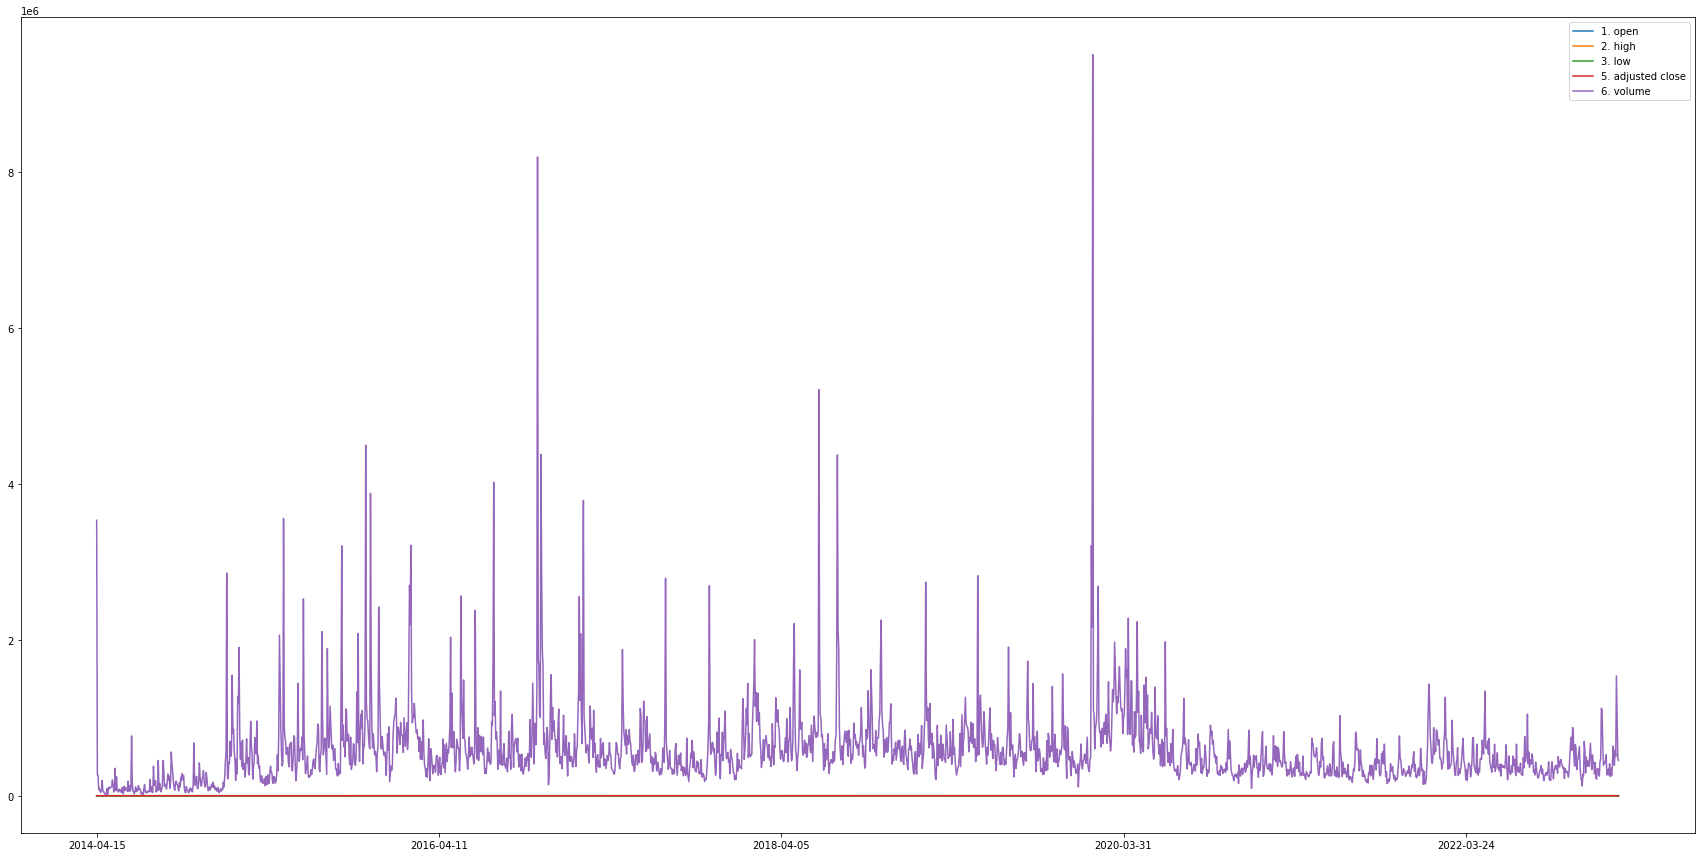

In [179]:
df.plot(figsize=(30,15))

In [180]:
names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday']
#df.index = pd.to_datetime(df.index)
#df.index.weekday

#for i, x in enumerate(names):
#    df[x] = (df.index.get_level_values(0).weekday == i).astype(int)
#df["Close"] = df["StockClose"]
df["Close"] = df["5. adjusted close"]
df = df.drop("5. adjusted close", axis=1)
df

,1. open,2. high,3. low,6. volume,Close
2014-04-15,17.9000,17.920,15.150,3531700.0,15.35
2014-04-16,15.3500,16.090,15.210,266500.0,15.62
2014-04-17,15.9500,16.550,15.710,262100.0,16.25
2014-04-21,16.5900,16.590,16.010,78000.0,16.10
2014-04-22,16.2000,16.689,15.760,96100.0,15.98
...,...,...,...,...,...
2023-02-07,328.3700,347.400,325.325,504667.0,344.52
2023-02-08,330.0000,330.710,312.190,1536645.0,321.21
2023-02-09,327.0999,330.090,320.880,1018760.0,322.48
2023-02-10,319.0000,320.395,313.500,479255.0,317.09


In [181]:
data = df[["Close"]]
data = data.rename(columns = {'Close':'Forecast_Close'})

# Setup our target.  This identifies if the price went up or down
#data["Target"] = df.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]
data

,Forecast_Close
2014-04-15,15.35
2014-04-16,15.62
2014-04-17,16.25
2014-04-21,16.10
2014-04-22,15.98
...,...
2023-02-07,344.52
2023-02-08,321.21
2023-02-09,322.48
2023-02-10,317.09


In [182]:
df_prev = df.copy()
df_prev = df_prev.shift(1)
df_prev

,1. open,2. high,3. low,6. volume,Close
2014-04-15,NaN,NaN,NaN,NaN,NaN
2014-04-16,17.9000,17.920,15.150,3531700.0,15.35
2014-04-17,15.3500,16.090,15.210,266500.0,15.62
2014-04-21,15.9500,16.550,15.710,262100.0,16.25
2014-04-22,16.5900,16.590,16.010,78000.0,16.10
...,...,...,...,...,...
2023-02-07,332.7200,335.820,328.680,578319.0,329.69
2023-02-08,328.3700,347.400,325.325,504667.0,344.52
2023-02-09,330.0000,330.710,312.190,1536645.0,321.21
2023-02-10,327.0999,330.090,320.880,1018760.0,322.48


In [183]:
predictors = ["Close", "6. volume", "1. open", "2. high", "3. low"]
data = data.join(df_prev[predictors]).iloc[1:]
df = data
df

,Forecast_Close,Close,6. volume,1. open,2. high,3. low
2014-04-16,15.62,15.35,3531700.0,17.9000,17.920,15.150
2014-04-17,16.25,15.62,266500.0,15.3500,16.090,15.210
2014-04-21,16.10,16.25,262100.0,15.9500,16.550,15.710
2014-04-22,15.98,16.10,78000.0,16.5900,16.590,16.010
2014-04-23,16.07,15.98,96100.0,16.2000,16.689,15.760
...,...,...,...,...,...,...
2023-02-07,344.52,329.69,578319.0,332.7200,335.820,328.680
2023-02-08,321.21,344.52,504667.0,328.3700,347.400,325.325
2023-02-09,322.48,321.21,1536645.0,330.0000,330.710,312.190
2023-02-10,317.09,322.48,1018760.0,327.0999,330.090,320.880


In [184]:
data = df[["Close"]]
data = data.rename(columns = {'Close':'CloseT-1'})
data = data.shift(1)
predictors = ["CloseT-1"]
df = df.join(data[predictors]).iloc[1:]

data = df[["Close"]]
data = data.rename(columns = {'Close':'CloseT-2'})
data = data.shift(2)
predictors = ["CloseT-2"]
df = df.join(data[predictors]).iloc[2:]
df

,Forecast_Close,Close,6. volume,1. open,2. high,3. low,CloseT-1,CloseT-2
2014-04-22,15.98,16.10,78000.0,16.5900,16.590,16.010,16.25,15.62
2014-04-23,16.07,15.98,96100.0,16.2000,16.689,15.760,16.10,16.25
2014-04-24,15.75,16.07,56500.0,15.8200,16.180,15.800,15.98,16.10
2014-04-25,15.30,15.75,42800.0,16.2800,16.300,15.750,16.07,15.98
2014-04-28,14.97,15.30,71600.0,15.7500,15.750,15.250,15.75,16.07
...,...,...,...,...,...,...,...,...
2023-02-07,344.52,329.69,578319.0,332.7200,335.820,328.680,337.44,352.41
2023-02-08,321.21,344.52,504667.0,328.3700,347.400,325.325,329.69,337.44
2023-02-09,322.48,321.21,1536645.0,330.0000,330.710,312.190,344.52,329.69
2023-02-10,317.09,322.48,1018760.0,327.0999,330.090,320.880,321.21,344.52


In [185]:
dfma10 = pd.DataFrame(MA10["Technical Analysis: SMA"])
dfma10 = dfma10.T
dfma10 = dfma10.rename(columns = {'SMA':'SMA10'})
print(dfma10.columns)
for i,x in enumerate(dfma10.columns):
    dfma10[dfma10.columns[i]] = dfma10[dfma10.columns[i]].astype(float)
df = pd.merge(dfma10, df, left_index=True, right_index=True, how='outer')
df

Index(['SMA10'], dtype='object')


,SMA10,Forecast_Close,Close,6. volume,1. open,2. high,3. low,CloseT-1,CloseT-2
2014-04-22,NaN,15.98,16.10,78000.0,16.5900,16.590,16.010,16.25,15.62
2014-04-23,NaN,16.07,15.98,96100.0,16.2000,16.689,15.760,16.10,16.25
2014-04-24,NaN,15.75,16.07,56500.0,15.8200,16.180,15.800,15.98,16.10
2014-04-25,NaN,15.30,15.75,42800.0,16.2800,16.300,15.750,16.07,15.98
2014-04-28,NaN,14.97,15.30,71600.0,15.7500,15.750,15.250,15.75,16.07
...,...,...,...,...,...,...,...,...,...
2023-02-07,326.311,344.52,329.69,578319.0,332.7200,335.820,328.680,337.44,352.41
2023-02-08,328.227,321.21,344.52,504667.0,328.3700,347.400,325.325,329.69,337.44
2023-02-09,329.010,322.48,321.21,1536645.0,330.0000,330.710,312.190,344.52,329.69
2023-02-10,329.088,317.09,322.48,1018760.0,327.0999,330.090,320.880,321.21,344.52


In [186]:
dfma5 = pd.DataFrame(MA5["Technical Analysis: SMA"])
dfma5 = dfma5.T
print(dfma5.columns)
dfma5 = dfma5.rename(columns = {'SMA':'SMA5'})
for i,x in enumerate(dfma5.columns):
    dfma5[dfma5.columns[i]] = dfma5[dfma5.columns[i]].astype(float)
df = pd.merge(dfma5, df, left_index=True, right_index=True, how='outer')
df

Index(['SMA'], dtype='object')


,SMA5,SMA10,Forecast_Close,Close,6. volume,1. open,2. high,3. low,CloseT-1,CloseT-2
2014-04-22,16.398,NaN,15.98,16.10,78000.0,16.5900,16.590,16.010,16.25,15.62
2014-04-23,15.982,NaN,16.07,15.98,96100.0,16.2000,16.689,15.760,16.10,16.25
2014-04-24,16.168,NaN,15.75,16.07,56500.0,15.8200,16.180,15.800,15.98,16.10
2014-04-25,16.128,NaN,15.30,15.75,42800.0,16.2800,16.300,15.750,16.07,15.98
2014-04-28,15.896,NaN,14.97,15.30,71600.0,15.7500,15.750,15.250,15.75,16.07
...,...,...,...,...,...,...,...,...,...,...
2023-02-07,335.918,326.311,344.52,329.69,578319.0,332.7200,335.820,328.680,337.44,352.41
2023-02-08,337.104,328.227,321.21,344.52,504667.0,328.3700,347.400,325.325,329.69,337.44
2023-02-09,332.150,329.010,322.48,321.21,1536645.0,330.0000,330.710,312.190,344.52,329.69
2023-02-10,327.438,329.088,317.09,322.48,1018760.0,327.0999,330.090,320.880,321.21,344.52


In [187]:
dfma50 = pd.DataFrame(MA50["Technical Analysis: SMA"])
dfma50 = dfma50.T
print(dfma50.columns)
dfma50 = dfma50.rename(columns = {'SMA':'SMA50'})
for i,x in enumerate(dfma50.columns):
    dfma50[dfma50.columns[i]] = dfma50[dfma50.columns[i]].astype(float)
df = pd.merge(dfma50, df, left_index=True, right_index=True, how='outer')
df

Index(['SMA'], dtype='object')


,SMA50,SMA5,SMA10,Forecast_Close,Close,6. volume,1. open,2. high,3. low,CloseT-1,CloseT-2
2014-04-22,NaN,16.398,NaN,15.98,16.10,78000.0,16.5900,16.590,16.010,16.25,15.62
2014-04-23,NaN,15.982,NaN,16.07,15.98,96100.0,16.2000,16.689,15.760,16.10,16.25
2014-04-24,NaN,16.168,NaN,15.75,16.07,56500.0,15.8200,16.180,15.800,15.98,16.10
2014-04-25,NaN,16.128,NaN,15.30,15.75,42800.0,16.2800,16.300,15.750,16.07,15.98
2014-04-28,NaN,15.896,NaN,14.97,15.30,71600.0,15.7500,15.750,15.250,15.75,16.07
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-07,315.3296,335.918,326.311,344.52,329.69,578319.0,332.7200,335.820,328.680,337.44,352.41
2023-02-08,315.3896,337.104,328.227,321.21,344.52,504667.0,328.3700,347.400,325.325,329.69,337.44
2023-02-09,315.4548,332.150,329.010,322.48,321.21,1536645.0,330.0000,330.710,312.190,344.52,329.69
2023-02-10,315.3236,327.438,329.088,317.09,322.48,1018760.0,327.0999,330.090,320.880,321.21,344.52


In [188]:
dfma200 = pd.DataFrame(MA200["Technical Analysis: SMA"])
dfma200 = dfma200.T
print(dfma200.columns)
dfma200 = dfma200.rename(columns = {'SMA':'SMA200'})
for i,x in enumerate(dfma200.columns):
    dfma200[dfma200.columns[i]] = dfma200[dfma200.columns[i]].astype(float)
df = pd.merge(dfma200, df, left_index=True, right_index=True, how='outer')
df

Index(['SMA'], dtype='object')


,SMA200,SMA50,SMA5,SMA10,Forecast_Close,Close,6. volume,1. open,2. high,3. low,CloseT-1,CloseT-2
2014-04-22,NaN,NaN,16.398,NaN,15.98,16.10,78000.0,16.5900,16.590,16.010,16.25,15.62
2014-04-23,NaN,NaN,15.982,NaN,16.07,15.98,96100.0,16.2000,16.689,15.760,16.10,16.25
2014-04-24,NaN,NaN,16.168,NaN,15.75,16.07,56500.0,15.8200,16.180,15.800,15.98,16.10
2014-04-25,NaN,NaN,16.128,NaN,15.30,15.75,42800.0,16.2800,16.300,15.750,16.07,15.98
2014-04-28,NaN,NaN,15.896,NaN,14.97,15.30,71600.0,15.7500,15.750,15.250,15.75,16.07
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-07,319.4358,315.3296,335.918,326.311,344.52,329.69,578319.0,332.7200,335.820,328.680,337.44,352.41
2023-02-08,319.5597,315.3896,337.104,328.227,321.21,344.52,504667.0,328.3700,347.400,325.325,329.69,337.44
2023-02-09,319.7284,315.4548,332.150,329.010,322.48,321.21,1536645.0,330.0000,330.710,312.190,344.52,329.69
2023-02-10,319.8290,315.3236,327.438,329.088,317.09,322.48,1018760.0,327.0999,330.090,320.880,321.21,344.52


In [189]:
ty10f = pd.DataFrame(ty10Data["data"])
ty10f = ty10f.set_index("date")
ty10f.index.names = [""]
ty10f = ty10f[ty10f.value != "."]
ty10f[ty10f.columns[0]] = ty10f[ty10f.columns[0]].astype(float)
ty10f = ty10f.rename({'value': 'TY10YR'}, axis=1)
ty10f = ty10f.sort_index()
diff = ty10f.diff(axis=0);
diff = diff.rename({'TY10YR': 'TY10YRDIFF'}, axis=1)
#ty10f = pd.merge(ty10f, diff, left_index=True, right_index=True, how='outer')
#ty10f = ty10f[ty10f['TY10YRDIFF'].notna()]
pctchng = ty10f.pct_change()
pctchng = pctchng.rename({'TY10YR': 'TY10YRPCT'}, axis=1)
#print(pctchng)
#ty10f = pd.merge(ty10f, pctchng, left_index=True, right_index=True, how='outer')
#ty10f = ty10f[ty10f['TY10YRPCT'].notna()]
#ty10f = ty10f.drop("TY10YR", axis=1)
ty10f

,TY10YR
,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03
...,...
2023-02-06,3.63
2023-02-07,3.67
2023-02-08,3.63


In [190]:
ty2f = pd.DataFrame(ty2Data["data"])
ty2f = ty2f.set_index("date")
ty2f.index.names = [""]
ty2f = ty2f[ty2f.value != "."]
ty2f[ty2f.columns[0]] = ty2f[ty2f.columns[0]].astype(float)
ty2f = ty2f.rename({'value': 'TY2YR'}, axis=1)
ty2f = ty2f.sort_index()
pctchng = ty2f.pct_change()
pctchng = pctchng.rename({'TY2YR': 'TY2YRPCT'}, axis=1)
#print(pctchng)
#ty2f = pd.merge(ty2f, pctchng, left_index=True, right_index=True, how='outer')
#ty2f = ty2f[ty2f['TY2YRPCT'].notna()]
ty2f

,TY2YR
,
1976-06-01,7.26
1976-06-02,7.23
1976-06-03,7.22
1976-06-04,7.12
1976-06-07,7.09
...,...
2023-02-06,4.44
2023-02-07,4.47
2023-02-08,4.45


In [191]:
#ndf = pd.merge(ty10f, df, left_index=True, right_index=True, how='outer')
#ndf = pd.merge(ty2f, ndf, left_index=True, right_index=True, how='outer')
#ndf = ndf[ndf['Close'].notna()]
#ndf = ndf[ndf['TY10YRPCT'].notna()]
#ndf = ndf[ndf['TY10YR'].notna()]
#ndf = ndf[ndf['TY2YR'].notna()]
#ndf = ndf[ndf['TY2YRPCT'].notna()]
ndf = df
ndf = ndf[ndf['SMA10'].notna()]
ndf = ndf[ndf['SMA5'].notna()]
ndf = ndf[ndf['SMA50'].notna()]
ndf = ndf[ndf['SMA200'].notna()]
print(ndf.shape)
ndf

(2025, 12)


,SMA200,SMA50,SMA5,SMA10,Forecast_Close,Close,6. volume,1. open,2. high,3. low,CloseT-1,CloseT-2
2015-01-29,18.2659,26.2414,27.622,25.827,27.40,28.76,1546190.0,28.4700,30.200,27.810,28.12,27.41
2015-01-30,18.3128,26.3100,27.852,26.162,26.17,27.40,797902.0,28.9400,29.370,26.240,28.76,28.12
2015-02-02,18.3664,26.3294,27.622,26.419,26.09,26.17,851873.0,27.2700,27.780,25.130,27.40,28.76
2015-02-03,18.4171,26.3522,27.370,26.679,27.58,26.09,567567.0,26.0700,27.100,25.280,26.17,27.40
2015-02-04,18.4702,26.3834,27.118,27.011,27.08,27.58,463376.0,26.1000,27.810,26.000,26.09,26.17
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-07,319.4358,315.3296,335.918,326.311,344.52,329.69,578319.0,332.7200,335.820,328.680,337.44,352.41
2023-02-08,319.5597,315.3896,337.104,328.227,321.21,344.52,504667.0,328.3700,347.400,325.325,329.69,337.44
2023-02-09,319.7284,315.4548,332.150,329.010,322.48,321.21,1536645.0,330.0000,330.710,312.190,344.52,329.69
2023-02-10,319.8290,315.3236,327.438,329.088,317.09,322.48,1018760.0,327.0999,330.090,320.880,321.21,344.52


In [192]:
ndf.corr()

,SMA200,SMA50,SMA5,SMA10,Forecast_Close,Close,6. volume,1. open,2. high,3. low,CloseT-1,CloseT-2
SMA200,1.000000,0.972139,0.953904,0.956048,0.951782,0.952323,-0.205667,0.952541,0.954009,0.950736,0.952863,0.953394
SMA50,0.972139,1.000000,0.984480,0.987740,0.980546,0.981721,-0.199929,0.982577,0.983174,0.981038,0.982847,0.983926
SMA5,0.953904,0.984480,1.000000,0.999112,0.997865,0.998837,-0.207358,0.999340,0.999235,0.998991,0.999388,0.999492
SMA10,0.956048,0.987740,0.999112,1.000000,0.996253,0.997215,-0.206619,0.997836,0.997815,0.997298,0.997971,0.998517
Forecast_Close,0.951782,0.980546,0.997865,0.996253,1.000000,0.998859,-0.208229,0.998060,0.998509,0.998578,0.997785,0.996636
Close,0.952323,0.981721,0.998837,0.997215,0.998859,1.000000,-0.208816,0.999214,0.999640,0.999661,0.998860,0.997785
6. volume,-0.205667,-0.199929,-0.207358,-0.206619,-0.208229,-0.208816,1.000000,-0.208539,-0.204792,-0.212982,-0.207810,-0.206966
1. open,0.952541,0.982577,0.999340,0.997836,0.998060,0.999214,-0.208539,1.000000,0.999684,0.999589,0.999701,0.998611
2. high,0.954009,0.983174,0.999235,0.997815,0.998509,0.999640,-0.204792,0.999684,1.000000,0.999548,0.999409,0.998359
3. low,0.950736,0.981038,0.998991,0.997298,0.998578,0.999661,-0.212982,0.999589,0.999548,1.000000,0.999232,0.998050


In [193]:
X = ndf.drop(['Forecast_Close'], axis=1)
y = ndf['Forecast_Close']

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [195]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [196]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [197]:
y_pred = model.predict(X_test)
y_pred

array([ 32.24061077, 511.42103072,  65.66101066,  41.13687164,
        65.16216877,  32.5816141 ,  35.24610135, 105.28584988,
        40.89158206, 124.80062529, 206.25432225,  66.91479176,
        80.71322843, 458.85627122, 264.9891361 ,  50.30266099,
        46.30213553, 152.20983229,  71.09781418, 322.02752979,
       356.60955235, 319.27886038, 360.17893796, 112.84247941,
       213.99642642, 285.45947678, 381.31108772, 107.53598908,
        78.33950981,  65.32904466, 367.78956313,  75.21098994,
       318.7880408 , 110.73727993,  78.07170789,  75.01373507,
       387.38581405, 181.88252379, 120.58215329,  34.02862288,
        74.79739126, 366.64583161, 183.73927577,  33.43285369,
        73.31149973,  27.43030969, 328.46533898, 353.91048211,
       102.53359633, 136.64835994, 384.94999316, 187.23727227,
       269.54707057,  30.60386043, 350.24984823, 102.37659687,
       275.9039067 , 111.82378602, 335.70835999, 126.53136425,
       294.55162583, 387.48506823, 144.57071824, 300.74

In [198]:
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred))) 

RMSE:  6.679021380460766


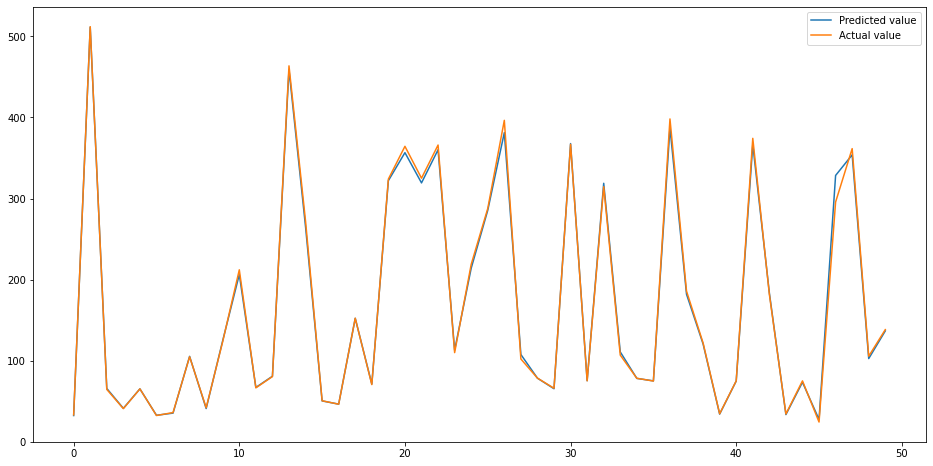

In [199]:
test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Predicted value','Actual value'])

In [200]:
print(y_pred, "\n", y_test)

[ 32.24061077 511.42103072  65.66101066  41.13687164  65.16216877
  32.5816141   35.24610135 105.28584988  40.89158206 124.80062529
 206.25432225  66.91479176  80.71322843 458.85627122 264.9891361
  50.30266099  46.30213553 152.20983229  71.09781418 322.02752979
 356.60955235 319.27886038 360.17893796 112.84247941 213.99642642
 285.45947678 381.31108772 107.53598908  78.33950981  65.32904466
 367.78956313  75.21098994 318.7880408  110.73727993  78.07170789
  75.01373507 387.38581405 181.88252379 120.58215329  34.02862288
  74.79739126 366.64583161 183.73927577  33.43285369  73.31149973
  27.43030969 328.46533898 353.91048211 102.53359633 136.64835994
 384.94999316 187.23727227 269.54707057  30.60386043 350.24984823
 102.37659687 275.9039067  111.82378602 335.70835999 126.53136425
 294.55162583 387.48506823 144.57071824 300.74967488 276.44295799
 235.31840398  40.56528921 291.97039779 341.66745916 419.9178536
  82.59941153 242.36768525 371.51035153 479.24957475  55.67604998
 283.0891613